In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Egendefinert funksjon for å markere interessante punkt langs x-aksen
def add_xtick(axes, x, label):
    xlim = axes.get_xlim()
    xticks = axes.get_xticks()
    xticks = np.append(xticks, np.sqrt(1/(L*C)))
    xticklabels = axes.get_xticklabels()
    xticklabels = np.append(xticklabels, label)
    axes.set_xticks(xticks)
    axes.set_xticklabels(xticklabels)
    axes.set_xlim(xlim)

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Frekvensrespons og Transferfunksjoner

* **Emne AIS1004 - Industriell Elektroteknikk**
* **Uke 8, 2024**
* **Underviser: Kai Erik Hoff**

# Tema

* Repetisjon impedans
* Frekvensrespons
    * Hva er det?
    * Hvordan finner vi den
* Visuell representasjon av frekvensrespons
    * Logaritisk skala
    * Decibel
* Laplace og transferfunksjon
    * Differensialligning $\rightarrow$ transferfunksjon
    * Visuell reperesentasjon
    * Sammenheng med frekvensrespons
* Filterkretser

## Rep: Impedans

* Kompleks relasjon mellom *visere* for strøm og spenning i en krets

$$\boldsymbol{Z} = \frac{\boldsymbol{V}}{\boldsymbol{I}}$$

Total impedans i  en krets finnes ved å legge sammen inpedansen til individuelle komponenter

<img src="Figurer/08_Filterkretser/Impedans.png" width="80%" />

<img src="Figurer/08_Filterkretser/PhasorDiagram.png" width="75%" />

## Rep: Impedans i motstander

<img src="Figurer/08_Filterkretser/Motstand.png" width="50%" />

## Rep: Impedans i spoler

<img src="Figurer/08_Filterkretser/Spole.png" width="50%" />

## Rep: Impedans i Kondensatorer

<img src="Figurer/08_Filterkretser/Kondensator.png" width="50%" />

## Quiz: viserdiagram

<img src="Figurer/08_Filterkretser/Quiz1.png" width="80%" />

# Frekvensrespons

* Hva er *forholdet* mellom $v_{ut}(t)$ og $v_{inn}(t)$ når $v_{inn}(t)$ er en sinusbølge?
$$v_{inn}(t) = A \cdot \sin(\omega \cdot t + \phi)$$
* Kan anses som en *frekvensavhengig formel for spenningsdeling*

<img src="Figurer/07_RLC/VoltageDiv.png" width="50%" />

$$H(j\omega) = \frac{\boldsymbol{V}_{ut}(j\omega)}{\boldsymbol{V}_{inn}(j\omega)} = \frac{\boldsymbol{Z}_{2}(j\omega)}{\boldsymbol{Z}_{1}(j\omega)+\boldsymbol{Z}_{2}(j\omega)}$$

# Frekvensrespons og sinuspåtrykk

* Frekvensresponsen $H(j\omega)$ gir oss en rask måte å finne $v_{ut}(t)$ gitt at $v_{inn}(t)$ er sinusformet.
$$
\begin{align}
v_{inn}(t) &= A\cdot \sin(\omega \cdot t + \phi)\\
&\Downarrow\\
v_{ut}(t) &= \left|H(j\omega)\right| \cdot A\cdot \sin\left(\omega \cdot t + \phi + \angle H(j\omega) \right)
\end{align}
$$

<img src="Figurer/08_Filterkretser/Frekvensrespons.png" width="80%" />

## Demo: Frekvensrespons og sinuspåtrykk

Output()

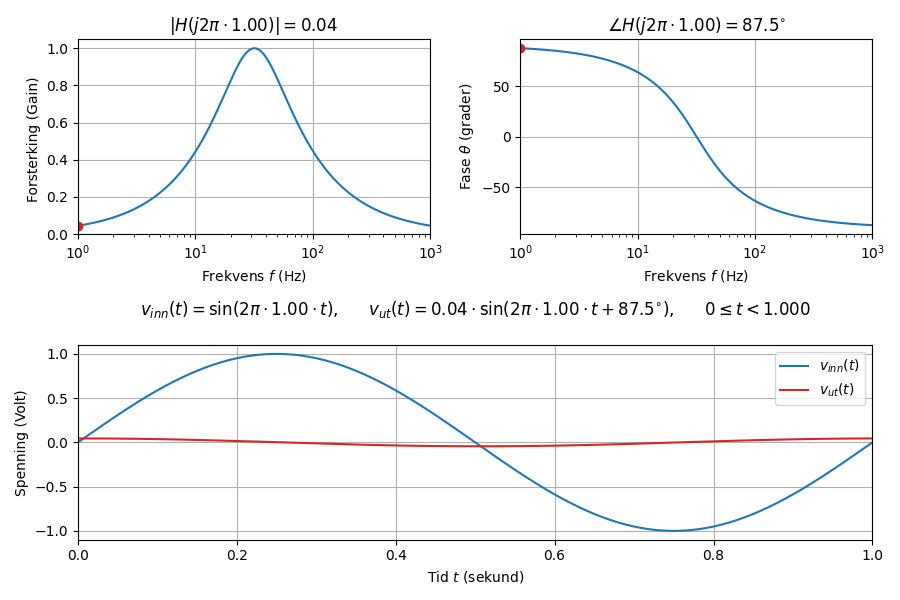

In [7]:
from Kildekode.Frekvensrespons import FreqRespDemo
%matplotlib ipympl
w_0 = 200
FreqRespDemo([np.sqrt(2)*w_0, 0],[1, np.sqrt(2)*w_0, w_0**2], figsize=(9,6), fig_num=1);

# Frekvensrespons RC seriekrets

<img src="Figurer/08_Filterkretser/RC_circ.png" width="50%" />

#### Utregning der $V_{ut}=V_C$:

$$
\begin{align}
I(j\omega) &= \frac{V_s(j\omega)}{R + \frac{1}{j\omega C}} \ \ \ \ \ \ \text{(Ohm's lov)}\\
V_C(j\omega) &= I(j\omega)\cdot \frac{1}{j\omega C}\\
&= \frac{V_s(j\omega)}{R + \frac{1}{j\omega C}}\cdot \frac{1}{j\omega C}\\
&= \frac{V_s(j\omega)}{j\omega RC + 1}\\
H(j\omega) = \frac{V_C(j\omega)}{V_s(j\omega)} &= \frac{1}{j\omega RC + 1}
\end{align}
$$

#### Omskriving til "standardform"
$$
\begin{align}
\frac{V_C(j\omega)}{V_s(j\omega)} &= \frac{\frac{1}{j\omega C}}{R + j\omega L + \frac{1}{j\omega C}}  \ \ \ \bigg| \times \frac{\frac{1}{RC}}{\frac{1}{RC}}\\
&= \frac{\frac{1}{RC}}{ j\omega + \frac{1}{RC}}
\end{align}
$$

# Frekvensrespons RLC seriekrets
<img src="Figurer/07_RLC/RLC2.png" width="50%" />

#### Utregning der $V_{ut}=V_C$:

$$
\begin{align}
I(j\omega) &= \frac{V_s(j\omega)}{R + j\omega L + \frac{1}{j\omega C}} \ \ \ \ \ \ \text{(Ohm's lov)}\\
V_C(j\omega) &= I(j\omega)\cdot \frac{1}{j\omega C}\\
&= \frac{V_s(j\omega)}{R + j\omega L + \frac{1}{j\omega C}}\cdot \frac{1}{j\omega C}\\
H(j\omega) = \frac{V_C(j\omega)}{V_s(j\omega)} &= \frac{1}{j\omega RC + (j\omega)^2LC + 1}
\end{align}
$$

#### Omskriving til "standardform"
$$
\begin{align}
\frac{V_C(j\omega)}{V_s(j\omega)} &= \frac{1}{j\omega RC + (j\omega)^2LC + 1}  \ \ \ \bigg| \times \frac{\frac{1}{LC}}{\frac{1}{LC}}\\
&= \frac{\frac{1}{LC}}{(j\omega)^2+\frac{R}{L}\cdot j\omega + \frac{1}{LC}}
\end{align}
$$


## Regneeksempel:


<img src="Figurer/07_RLC/RLC2.png" width="35%" />
$$R = 50\Omega, \ \ \ L = 1\mu H, \ \ \ C=100nF$$

* Bruk frekvensresponsen $H(j\omega)$ til å finne $v_{ut}(t)$ når $v_{inn}(t) = \sin(2\pi \cdot 12\ 000 \cdot t)$
* Bruk et oscilloskop til å sammenligne relle tall med teoretiske verdier.

# Grafisk analyse av frekvensrespons

* $H(j\omega)$ er en *kompleks* funksjon. Gir 2 "dimensjoner" av interesse:
    * Grad av forsterkning i kretsen (gain): $|H(j\omega)|$
    * Faseforskyvning i kretsen: $\angle H(j\omega)$
    

* Bruker typisk logaritmisk frekvensakse 
    * Endringer som regel mer synlige når vi ser på f.eks. antall ganger man tidobler frekvensen.

# Forsterkning (Gain) i RLC seriektrets

<img src="Figurer/07_RLC/RLC2.png" width="35%" />
$$R = 10\Omega, \ \ \ L = 0.2H, \ \ \ C=2mF$$

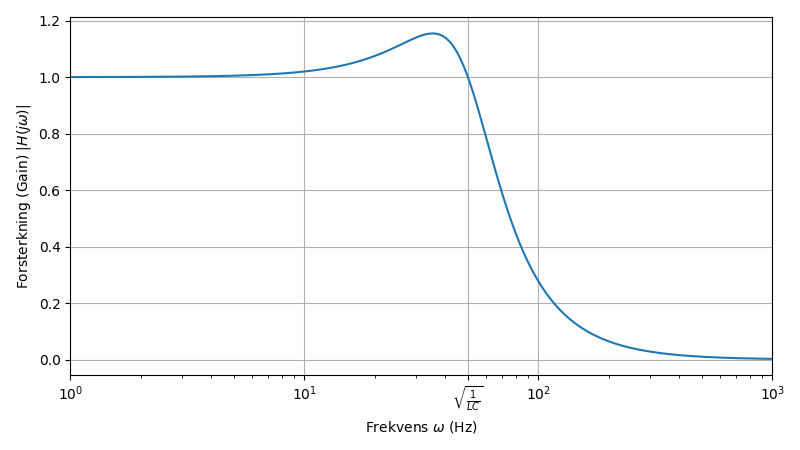

In [8]:

R = 10 # Ohm
L = 0.2 # Henry
C = 2e-3 # Farad (2mF)

w = np.logspace(0, 3, 201)
Hw = (1/(L*C))/((1j*w)**2 + R/L*1j*w + 1/(L*C))

plt.close(2);plt.figure(2)
plt.semilogx(w, np.abs(Hw))
plt.xlabel(r"Frekvens $\omega$ (Hz)")
plt.ylabel(r"Forsterkning (Gain) $|H(j\omega)|$")
add_xtick(plt.gca(), np.sqrt(1/(L*C)), r'$\sqrt{\frac{1}{LC}}$') # Legger til "naturlig frekvens"
    

# Faserespons i RLC seriektrets

<img src="Figurer/07_RLC/RLC2.png" width="35%" />
$$R = 10\Omega, \ \ \ L = 0.2H, \ \ \ C=2mF$$

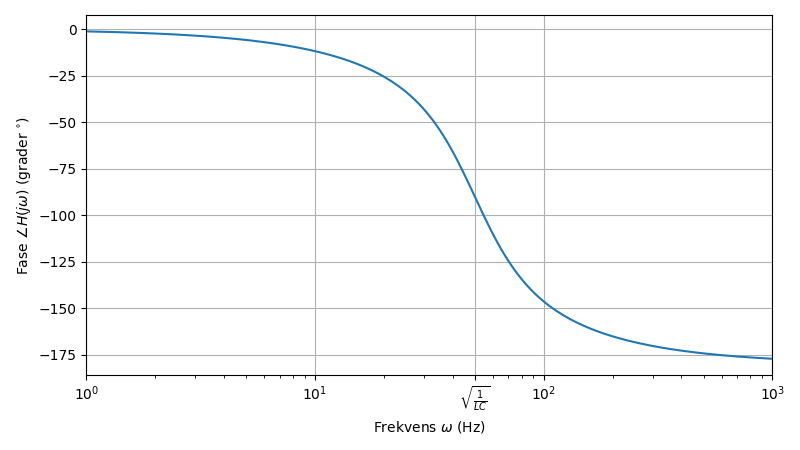

In [9]:
R = 10 # Ohm
L = 0.2 # Henry
C = 2e-3 # Farad (2mF)

w = np.logspace(0, 3, 201)
Hw = (1/(L*C))/((1j*w)**2 + R/L*1j*w + 1/(L*C))

plt.close(3);plt.figure(3)
plt.semilogx(w, np.angle(Hw, deg=True))
plt.xlabel(r"Frekvens $\omega$ (Hz)")
plt.ylabel(r"Fase $\angle H(j\omega)$ (grader $^{\circ}$)")
add_xtick(plt.gca(), np.sqrt(1/(L*C)), r'$\sqrt{\frac{1}{LC}}$') # Legger til "naturlig frekvens"

# Decibelskalaen

* Logaritmisk skala for å sammenligne to mengder
    * *For lydmålinger: hvor mange ganger sterkere er den målte lyden enn en referanseverdi.*
* For filterkretser gir den et forhold mellom effekt inn og effekt ut.
$$\text{Gain (dB)} = 10\cdot \log10\left(\frac{P_{ut}}{P_{inn}}\right)$$
    * Tilsvarer
$$
\begin{align}
\text{Gain (dB)} &= 10\cdot \log10\left(\frac{|V_{ut}|^2}{|V_{inn}|^2}\right)\\
&= 20\cdot \log10\left(\frac{|V_{ut}|}{|V_{inn}|}\right)
\end{align}
$$

# Bode-plot

* Fremstilling av både forsterkning og fase i to sidestilte figurer.
* Forsterkning målt i decibel (dB)
* Frekvensakser er logaritmiske

<img src="Figurer/08_Filterkretser/Bode.png" width="60%" />

# Nøkkelverdier decibelskala

|$$|H(j\omega)|$$ | $$|H(j\omega)|$$|
|---|---|
|$$40$$|$$100$$|
|$$20$$|$$10$$|
|$$6$$|$$2$$|
|$$3$$|$$\sqrt{2}\approx 1.4142$$|
|$$0$$|$$1$$|
|$$-3$$|$$\frac{1}{\sqrt{2}} \approx 0.7071$$|
|$$-6$$|$$\frac{1}{2}$$|
|$$-20$$|$$\frac{1}{10}$$|
|$$-40$$|$$\frac{1}{100}$$|

## Eksempel:

* Dersom amplituden $A_{inn}$ til en AC-spenning er 2V, og den blir dempet med $40$dB ($-40$dB forsterkning) av en filterkrets, hva er amplituden $A_{ut}$ til utgangsspenningen? 

# Transferfunksjoner

* Samme som frekvensrespons, men vi bruker laplace-operatoren $s$.

* Impedanser:

|Komponent|Impedans
|---|---|
|Motstand|$$\boldsymbol{Z(s)}=R$$|
|Spole|$$\boldsymbol{Z(s)} = s \cdot L$$|
|Kondensator | $$\boldsymbol{Z(s)} = \frac{1}{s\cdot C} = \frac{1}{s\cdot C}$$|



# Transferfunksjoner fra differensialligninger

* Utledes ved å laplacetransformere differensialligningen direkte:
$$ 
\begin{align}
a_0\cdot \frac{d^2 y(t)}{dt} + a_1 \cdot \frac{d y(t)}{dt} + a_2 +\cdot y(t)  &= b_0 \cdot x(t) \\
\mathcal{L}\left(a_0\cdot \frac{d^2 y(t)}{dt} + a_1 \cdot \frac{d y(t)}{dt} + a_2 +\cdot y(t) \right) &= \mathcal{L}\left(b_0 \cdot x(t)\right) \\
&\Downarrow \mathcal{L}\left(\frac{d f(t)}{dt} \right) = s\cdot F(s) \\
a_0\cdot s^2 \cdot Y(s) + a_1\cdot s\cdot Y(s) + a_2 \cdot Y(s) &= b_0 \cdot X(s) \\
Y(s) \cdot \left(a_0 \cdot s^2 + a_1 \cdot s + a_2\right) &= b_0 \cdot X(s) \\
\frac{Y(s)}{X(s)} &= \frac{b_0}{a_0\cdot s^2 + a_1 \cdot s + a_2}
\end{align}
$$

# Transferfunksjoner i Python

* Tar inn to arrays med ***filterkoeffisienter*** $a_i$ og $b_i$ 

* Eksempel:
$$H(s) = \frac{10000}{s^2 + 100s + 10000}$$

Text(0.5, 0, 'Vinkelfrekvens (rad/s)')

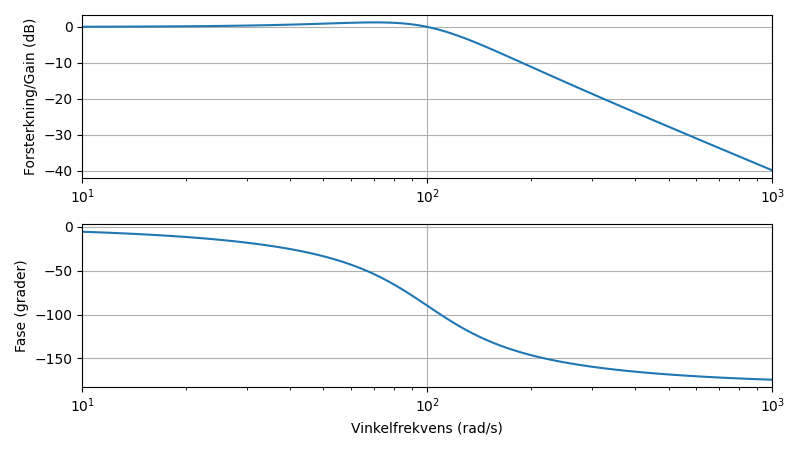

In [10]:
import scipy.signal as sig

sys = sig.TransferFunction([10_000],[1, 100, 10_000])
w, gain_dB, phase = sig.bode(sys)

plt.close(4);plt.figure(4)
plt.subplot(2,1,1)
plt.semilogx(w, gain_dB)
plt.ylabel("Forsterkning/Gain (dB)")
plt.subplot(2,1,2)
plt.semilogx(w, phase)
plt.ylabel("Fase (grader)")
plt.xlabel("Vinkelfrekvens (rad/s)")

# Transferfunksjoner og frekvensrespons

* Laplace-operatoren $s$ er et komplekst tall $s = \sigma + j\omega$
* Den imaginære aksen $s=j\omega$ kalles *frekvensaksen*
* Frekvensrespons:

$$H(j\omega) = H(s)|_{s=0+j\omega}$$

# Filterkretser

* Kretser med reaktive element kan designes slik at de kunn slipper gjennom sinussignal med noen frekvenser, samtidig som de stopper andre frekvenser fra å slippe gjennom.
* Slike kretser kalles *filtre*

<img src="Figurer/08_Filterkretser/Filterillustrasjon.png" width="70%" />

# Kantfrekvens $\omega_c / f_c$:

* Punktet på frekvensaksen der $P_{ut} = \frac{P_{inn}}{2}$:

$$|H(j\omega_c)| = \sqrt{\frac{1}{2}} = -3dB$$

<img src="Figurer/08_Filterkretser/Knekkfrekvens.png" width="50%" />

# Ulike Filterkategorier

<img src="Figurer/08_Filterkretser/Filtertypes.png" width="80%" />

## Førsteordens RC lavpass- og høypassfilter:

<img src="Figurer/08_Filterkretser/LP_HP.png" width="80%" />


$$\omega_c = \frac{1}{RC} = \frac{1}{\tau}$$

## Quiz:

* Hvor vil man måle utgangsspenningen for å oppnå:
    1. Lavpassfilter?
    2. Høypassfilter?
    3. Båndpassfilter?
    4. Båndstoppfilter?

    <img src="Figurer/07_RLC/RLC2.png" width="40%" />